# Air Pressure data from Weather News

In [1]:
import pandas as pd

df = pd.read_csv('./data/soratena_tonga.csv')
df.head()

,SoratenaID,DATE(UTC),ARPRSS,SoratenaName,LATD,LOND
0,1001,2022-01-15 11:00:00,997.7,鶴居タンチョウパパ,43.226,144.309
1,1001,2022-01-15 11:01:00,997.7,鶴居タンチョウパパ,43.226,144.309
2,1001,2022-01-15 11:02:00,997.8,鶴居タンチョウパパ,43.226,144.309
3,1001,2022-01-15 11:03:00,997.8,鶴居タンチョウパパ,43.226,144.309
4,1001,2022-01-15 11:04:00,997.9,鶴居タンチョウパパ,43.226,144.309


In [2]:
import geopandas as gpd

gdf = gpd.GeoDataFrame(data=df,geometry=gpd.points_from_xy(df['LOND'],df['LATD']))

<AxesSubplot:>

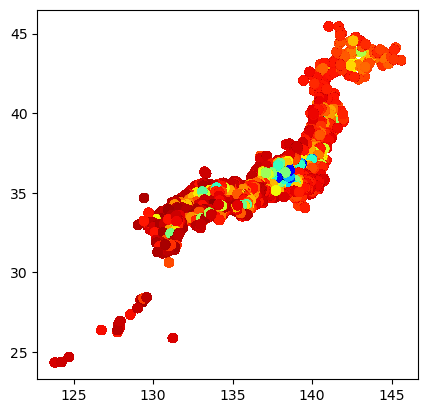

In [3]:
import matplotlib.style as mpls
mpls.use('default')

gdf.plot(column='ARPRSS',cmap='jet')

In [4]:
df.describe()

,SoratenaID,ARPRSS,LATD,LOND
count,764935.000000,764935.000000,764935.000000,764935.000000
mean,21404.936413,1000.603509,35.887148,136.873705
std,13172.020942,27.311418,2.783114,3.646831
min,1001.000000,828.700000,24.330000,123.819000
25%,11073.000000,995.400000,34.435000,134.238000
50%,21056.000000,1010.500000,35.383000,137.189000
75%,32014.000000,1016.700000,36.539000,139.798000
max,47039.000000,1032.500000,45.448000,145.582000


In [5]:
onepoint = df[df.SoratenaID == 1001]
onepoint.head()

,SoratenaID,DATE(UTC),ARPRSS,SoratenaName,LATD,LOND,geometry
0,1001,2022-01-15 11:00:00,997.7,鶴居タンチョウパパ,43.226,144.309,POINT (144.30900 43.22600)
1,1001,2022-01-15 11:01:00,997.7,鶴居タンチョウパパ,43.226,144.309,POINT (144.30900 43.22600)
2,1001,2022-01-15 11:02:00,997.8,鶴居タンチョウパパ,43.226,144.309,POINT (144.30900 43.22600)
3,1001,2022-01-15 11:03:00,997.8,鶴居タンチョウパパ,43.226,144.309,POINT (144.30900 43.22600)
4,1001,2022-01-15 11:04:00,997.9,鶴居タンチョウパパ,43.226,144.309,POINT (144.30900 43.22600)


<AxesSubplot:xlabel='DATE(UTC)'>

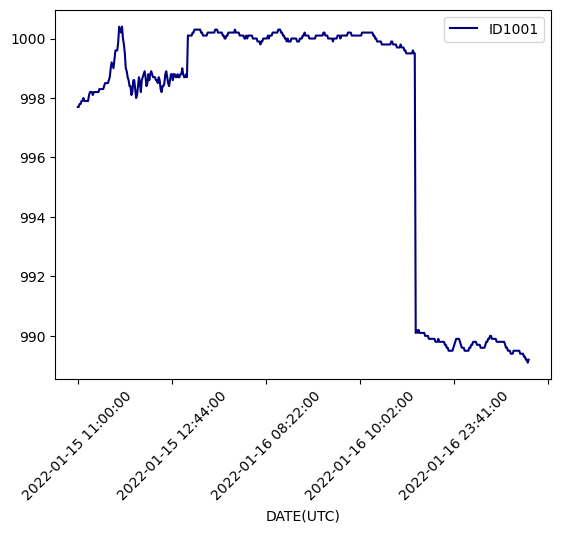

In [6]:
onepoint.plot('DATE(UTC)','ARPRSS',label='ID1001',cmap='jet',rot=45)

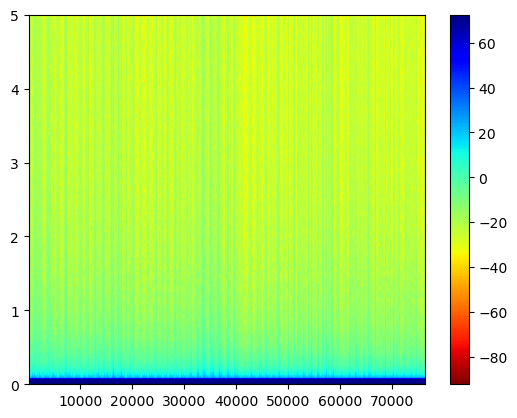

In [ ]:
import matplotlib.pyplot as plt

dt = 0.1
plt.specgram(df['ARPRSS'].to_numpy(),NFFT=256,Fs=1/dt,noverlap=10,cmap='jet_r')
plt.colorbar()
plt.show()

# Tsunami waveform

In [5]:
import pandas as pd
dft = pd.read_csv('./data/tide_japan.csv',index_col=0)
dft.head()

,Kushiro_Tide,Miyako_Tide,Ofunato_Tide,Ayukawa_Tide,Onahama_Tide,Chichijima_Tide,Hachijojima_Tide,Irozaki_Tide,Omaezaki_Tide,Kushimoto_Tide,Muroto_Tide,Tosashimizu_Tide,Aburatsu_Tide,Makurazaki_Tide,Amami_Tide
Time_min_Tide,,,,,,,,,,,,,,,
0,95,67,73,56,52,38,94,53,43,47,70,45,41,47,42
5,99,65,70,61,58,38,95,57,46,57,68,51,35,28,48
10,102,67,71,64,61,37,97,57,47,58,69,52,37,32,43
15,103,68,72,61,60,39,101,60,50,54,72,53,42,50,41
20,104,71,76,66,60,36,100,59,49,56,71,51,43,29,59


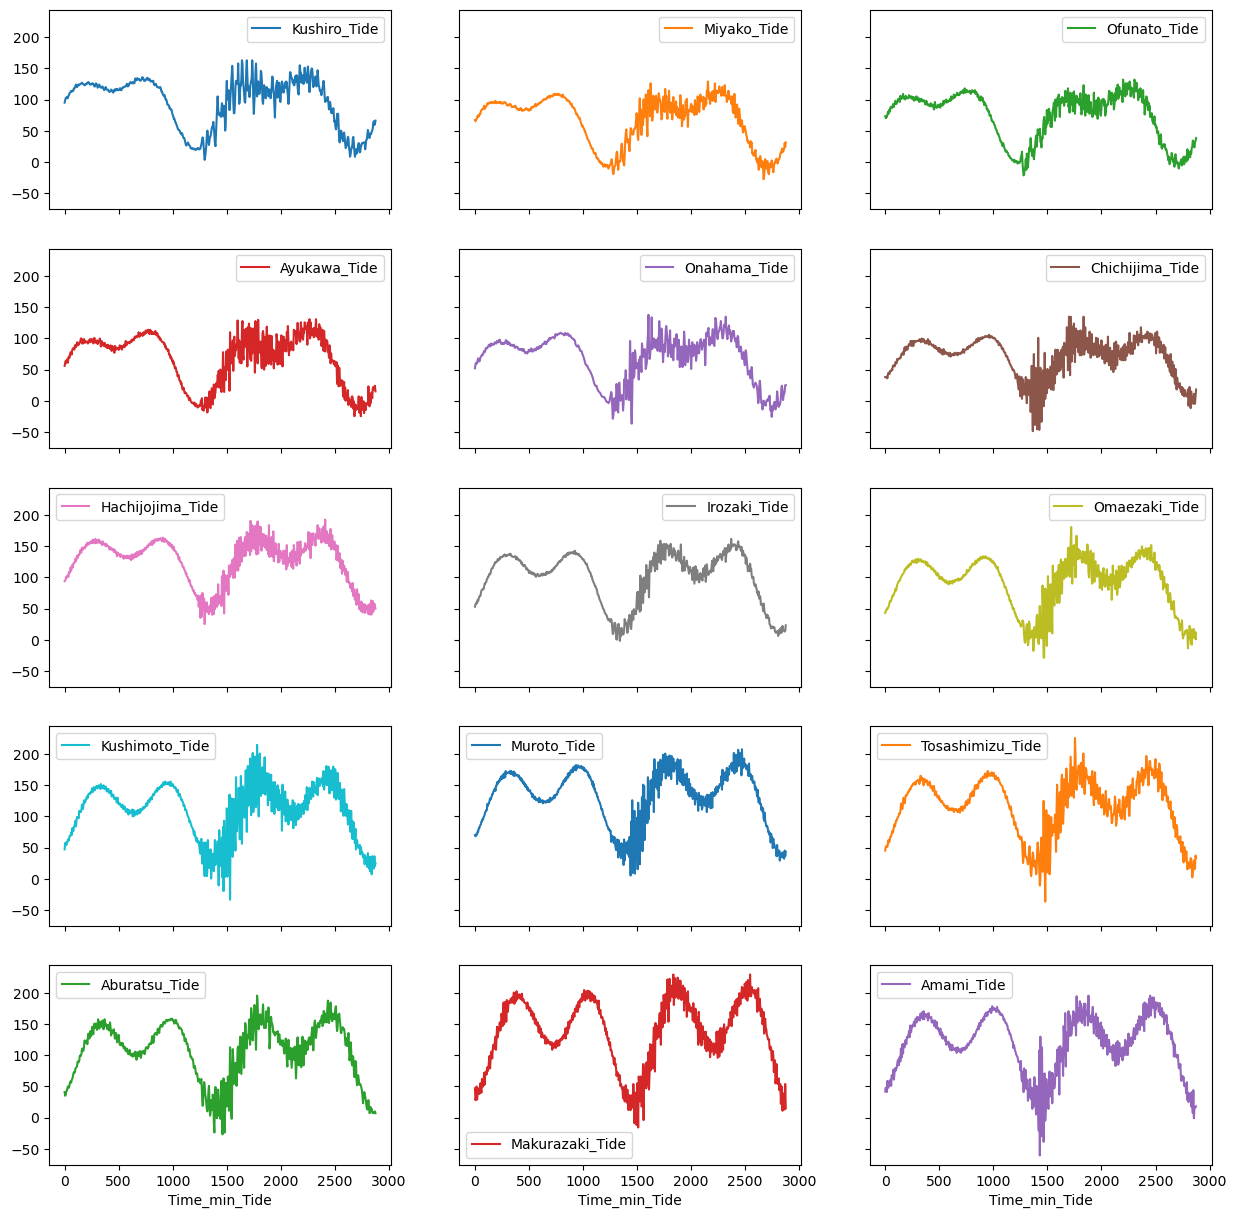

In [214]:
import matplotlib.style as mpls
mpls.use('default')

dft.plot(subplots=True,layout=(5,3),sharex=True,sharey=True,figsize=(15,15));


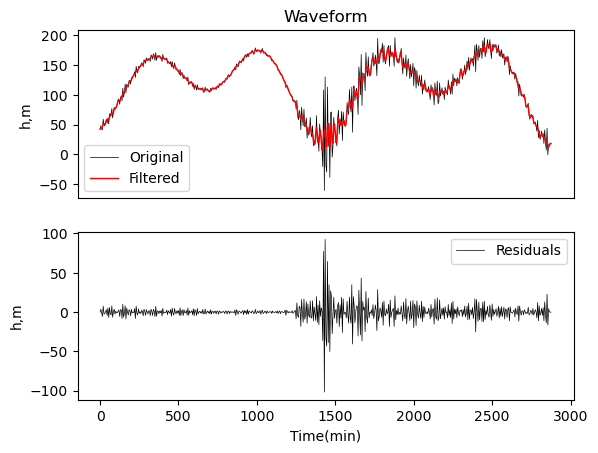

In [288]:
import scipy.signal as signal
import matplotlib.pyplot as plt

# First, design the Buterworth filter
N  = 2    # Filter order
Wn = 0.5 # Cutoff frequency
B, A = signal.butter(N, Wn, output='ba')
 
# Second, apply the filter
tempf = signal.filtfilt(B,A, dft.Amami_Tide.to_numpy())
 
# Make plots
fig = plt.figure()
ax1 = fig.add_subplot(211)
plt.plot(dft.index.to_numpy(),dft.Amami_Tide.to_numpy(), c='k',lw=0.5)
plt.plot(dft.index.to_numpy(),tempf, 'r-',linewidth=1)
plt.ylabel("h,m")
plt.legend(['Original','Filtered'])
plt.title("Waveform")
ax1.axes.get_xaxis().set_visible(False)
 
ax1 = fig.add_subplot(212)
plt.plot(dft.index.to_numpy(),dft.Amami_Tide.to_numpy()-tempf,c='k',lw=0.5)
plt.ylabel("h,m")
plt.xlabel("Time(min)")
plt.legend(['Residuals'])

In [300]:
import scipy.signal as signal
import matplotlib.pyplot as plt

def detide_tsunami(t,col,N=2,Wn=0.5):
    # First, design the Buterworth filter
    # N  = 2    # Filter order
    # Wn = 0.5 # Cutoff frequency
    B, A = signal.butter(N, Wn, output='ba')
    
    # Second, apply the filter
    tempf = signal.filtfilt(B,A,col)
    
    # # Make plots
    # fig = plt.figure()
    # ax1 = fig.add_subplot(211)
    # plt.plot(t,col, c='k',lw=0.5)
    # plt.plot(t,tempf, 'r-',linewidth=1)
    # plt.ylabel("h,m")
    # plt.legend(['Original','Filtered'])
    # plt.title("Waveform")
    # ax1.axes.get_xaxis().set_visible(False)
    
    # ax1 = fig.add_subplot(212)
    res=col-tempf
    # plt.plot(t,res,c='k',lw=0.5)
    # plt.ylabel("h,m")
    # plt.xlabel("Time(min)")
    # plt.legend(['Residuals'])
    return res

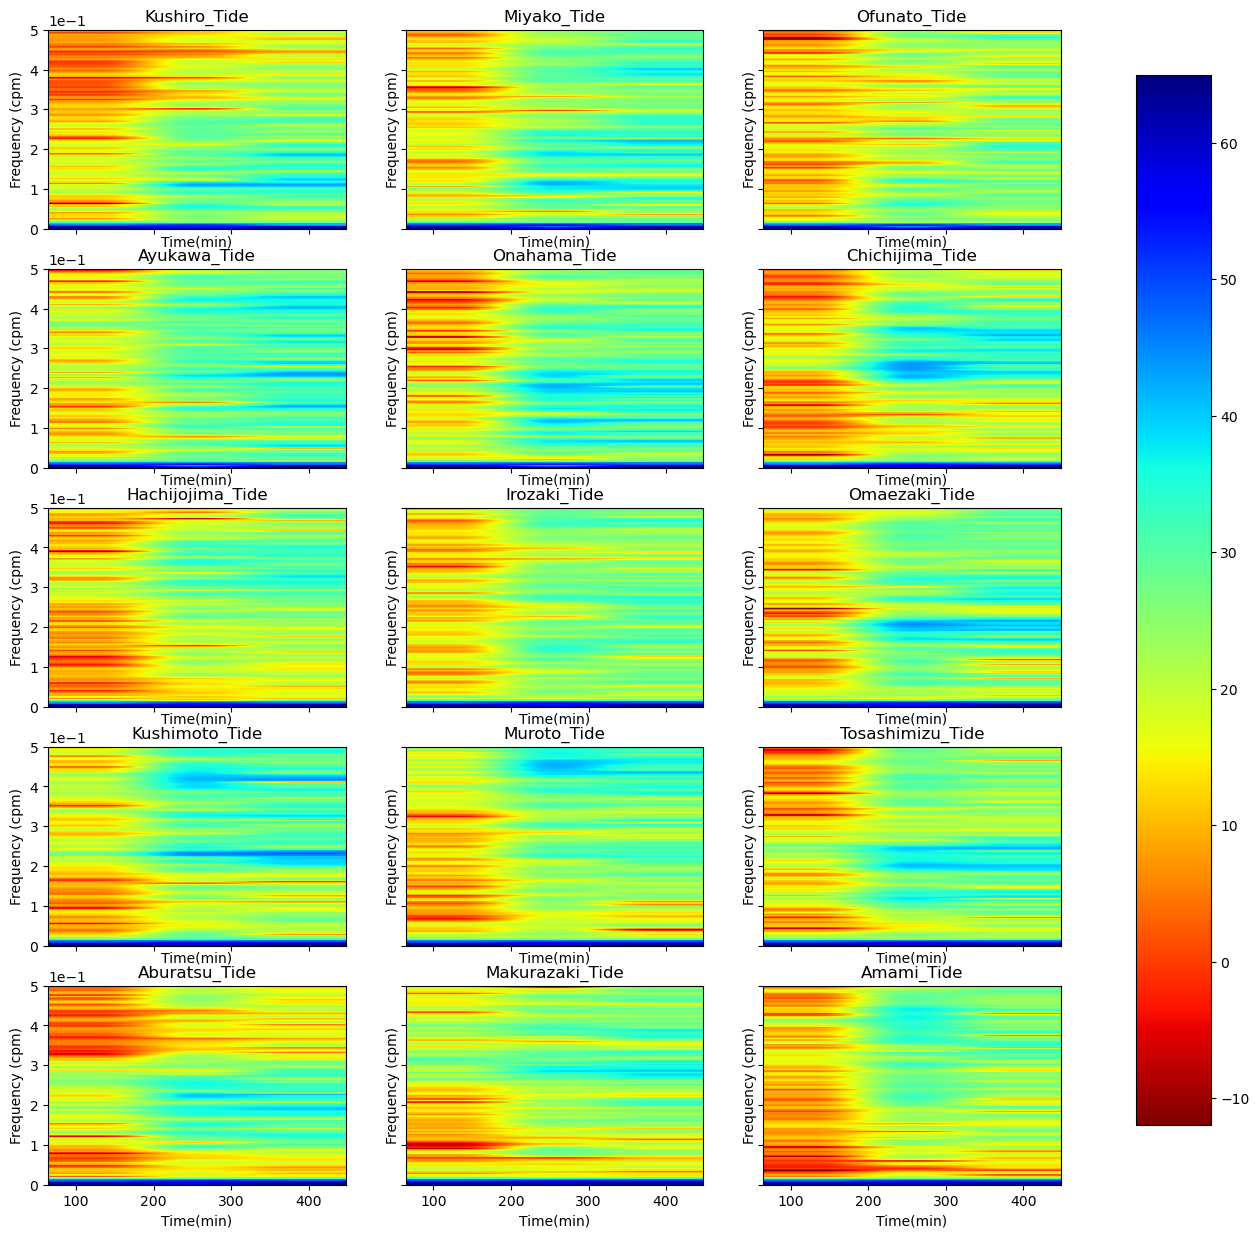

In [238]:
fig,axs = plt.subplots(5,3,sharex=True,sharey=True,figsize=(15,15))
dt = 5
for j in range(5):
    for k in range(3):
        # s,f,t,im = axs[j,k].specgram(dft.iloc[:,3*j+k],NFFT=256,Fs=12/dt,noverlap=128,
                                    #  cmap='jet_r',mode='psd',vmin=-50, vmax=200)
        s,f,t,im = axs[j,k].specgram(dft.iloc[:,3*j+k],Fs=5/dt,cmap='jet_r')
        axs[j,k].set_title(dft.columns[3*j+k])
        axs[k,k].ticklabel_format(axis="y", style="sci", scilimits=(0,0))

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85,0.15,0.05,0.7])
fig.colorbar(im,cax=cbar_ax)

for ax in axs.flat:
    ax.set(xlabel='Time(min)', ylabel='Frequency (cpm)')

Text(0.5, 1.0, 'dB')

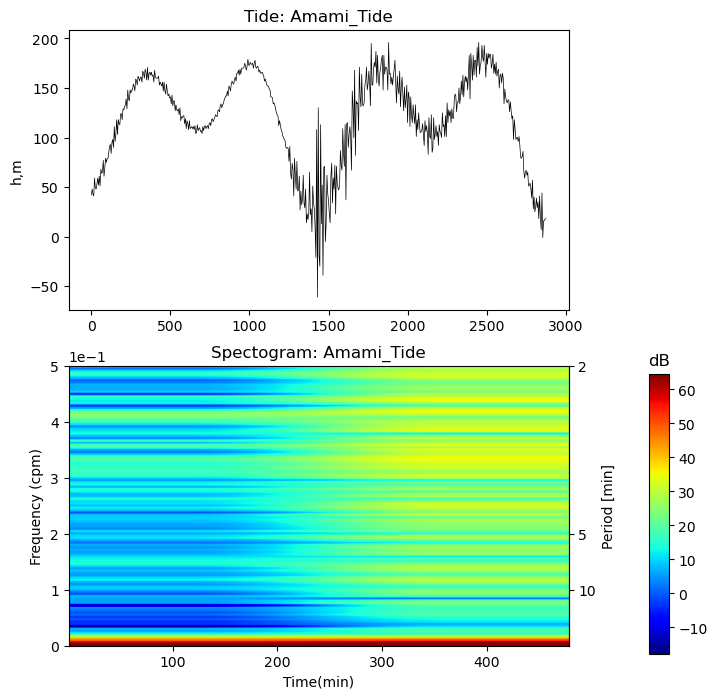

In [370]:
import numpy as np
import matplotlib.style as mpls
mpls.use('default')

def freq2period(x):
    # 1/x with special treatment of x == 0
    x = np.array(x).astype(float)
    near_zero = np.isclose(x, 0)
    x[near_zero] = 10e2
    x[~near_zero] = 1 / x[~near_zero]
    return x

col = 14
dt = 5

fig,axs = plt.subplots(2,sharex=False,figsize=(8,8))
axs[0].plot(dft.index.to_list(),dft.iloc[:,col].to_list(),c='k',lw=0.5)
axs[0].set_ylabel('h,m')
axs[0].set_title(f'Tide: {dft.columns[col]}')
s,f,t,im = axs[1].specgram(dft.iloc[:,col],NFFT=int(20.*60./5.),Fs=5/dt,noverlap=int(6./5.),
                           cmap='jet',mode='psd')#,vmin=0,vmax=14)
# s,f,t,im = axs[1].specgram(dft.iloc[:,col],Fs=5/dt,cmap='jet_r',vmin=0,vmax=14)
axs[1].set_title(f'Spectogram: {dft.columns[col]}')
axs[1].set_xlabel('Time(min)')
axs[1].set_ylabel('Frequency (cpm)')
axs[1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
secax = axs[1].secondary_yaxis('right',functions=(freq2period,freq2period))
secax.set_yticks([2,5,10])
secax.set_yticklabels([2,5,10])
secax.set_ylabel('Period [min]')
fig.subplots_adjust(right=0.75)
cbar_ax = fig.add_axes([0.85,0.1,0.025,0.35])
fig.colorbar(im,cax=cbar_ax)
cbar_ax.set_title('dB')

In [302]:
dftt = pd.DataFrame()
for i,col in dft.iteritems():
    dftt[i]=detide_tsunami(dft.index.to_numpy(),col)
dftt.head()

,Kushiro_Tide,Miyako_Tide,Ofunato_Tide,Ayukawa_Tide,Onahama_Tide,Chichijima_Tide,Hachijojima_Tide,Irozaki_Tide,Omaezaki_Tide,Kushimoto_Tide,Muroto_Tide,Tosashimizu_Tide,Aburatsu_Tide,Makurazaki_Tide,Amami_Tide
Time_min_Tide,,,,,,,,,,,,,,,
0,0.000068,0.000130,0.000081,0.000371,0.000241,0.000003,0.000341,0.000154,-0.000008,0.000041,0.000082,0.000015,0.000214,0.000113,-0.000104
5,0.074033,-0.805196,-0.669165,0.314521,0.236109,0.161113,-0.244565,0.913488,0.404665,1.614231,-0.633208,0.799928,-1.592390,-5.389832,3.622360
10,0.218141,0.687987,0.585673,1.247261,0.713890,-0.618782,-0.438717,-0.914828,-0.706236,0.572262,-0.164984,-0.330905,0.012529,-2.134919,-1.012377
15,-0.370085,-0.474204,-0.653547,-2.571573,-0.179737,1.694190,1.222957,0.932297,0.976367,-1.571089,1.166235,1.000562,1.462901,10.952357,-5.610408
20,0.191088,-0.128054,-0.014117,1.516062,-1.283580,-2.287313,-1.368036,-1.511187,-0.762575,0.066384,-1.510181,-2.014588,-1.075390,-9.190599,7.574367


In [309]:
import pandas as pd
dftk = pd.read_csv('./data/residual_tide_japan.csv',index_col=0)
dftk.head()

,Kushiro_Residual,Miyako_Residual,Ofunato_Residual,Ayukawa_Residual,Onahama_Residual,Chichijima_Residual,Hachijojima_Residual,Irozaki_Residual,Omaezaki_Residual,Kushimoto_Residual,Muroto_Residual,Tosashimizu_Residual,Aburatsu_Residual,Makurazaki_Residual,Amami_Residual
Time_min_Tide,,,,,,,,,,,,,,,
0,-10.758327,-6.667197,-5.288917,-12.063898,-12.593683,12.842440,-10.515800,-12.759145,-12.462722,-15.585661,-7.221111,-15.222121,10.560065,6.728328,3.802997
5,-6.810846,-8.727744,-8.365281,-7.134983,-6.654439,10.748626,-9.596012,-8.852260,-9.556692,-5.675120,-9.335538,-9.328761,2.487074,-12.360173,8.203209
10,-3.967467,-6.908225,-7.592365,-4.347028,-3.835859,7.621580,-7.835541,-9.130327,-8.837342,-4.942478,-8.676962,-8.647358,2.297990,-8.624895,1.465929
15,-3.225418,-6.205206,-6.964250,-7.696441,-5.135417,7.483170,-4.231104,-6.589563,-6.300947,-9.384717,-6.239908,-8.173990,5.015635,8.936446,-2.386998
20,-2.580190,-3.613118,-3.471455,-3.177372,-5.548985,2.353413,-5.777353,-8.223813,-7.941455,-7.996912,-8.015550,-10.902275,3.661886,-12.672536,13.665669


In [310]:
dftt.head()

,Kushiro_Tide,Miyako_Tide,Ofunato_Tide,Ayukawa_Tide,Onahama_Tide,Chichijima_Tide,Hachijojima_Tide,Irozaki_Tide,Omaezaki_Tide,Kushimoto_Tide,Muroto_Tide,Tosashimizu_Tide,Aburatsu_Tide,Makurazaki_Tide,Amami_Tide
Time_min_Tide,,,,,,,,,,,,,,,
0,0.000068,0.000130,0.000081,0.000371,0.000241,0.000003,0.000341,0.000154,-0.000008,0.000041,0.000082,0.000015,0.000214,0.000113,-0.000104
5,0.074033,-0.805196,-0.669165,0.314521,0.236109,0.161113,-0.244565,0.913488,0.404665,1.614231,-0.633208,0.799928,-1.592390,-5.389832,3.622360
10,0.218141,0.687987,0.585673,1.247261,0.713890,-0.618782,-0.438717,-0.914828,-0.706236,0.572262,-0.164984,-0.330905,0.012529,-2.134919,-1.012377
15,-0.370085,-0.474204,-0.653547,-2.571573,-0.179737,1.694190,1.222957,0.932297,0.976367,-1.571089,1.166235,1.000562,1.462901,10.952357,-5.610408
20,0.191088,-0.128054,-0.014117,1.516062,-1.283580,-2.287313,-1.368036,-1.511187,-0.762575,0.066384,-1.510181,-2.014588,-1.075390,-9.190599,7.574367


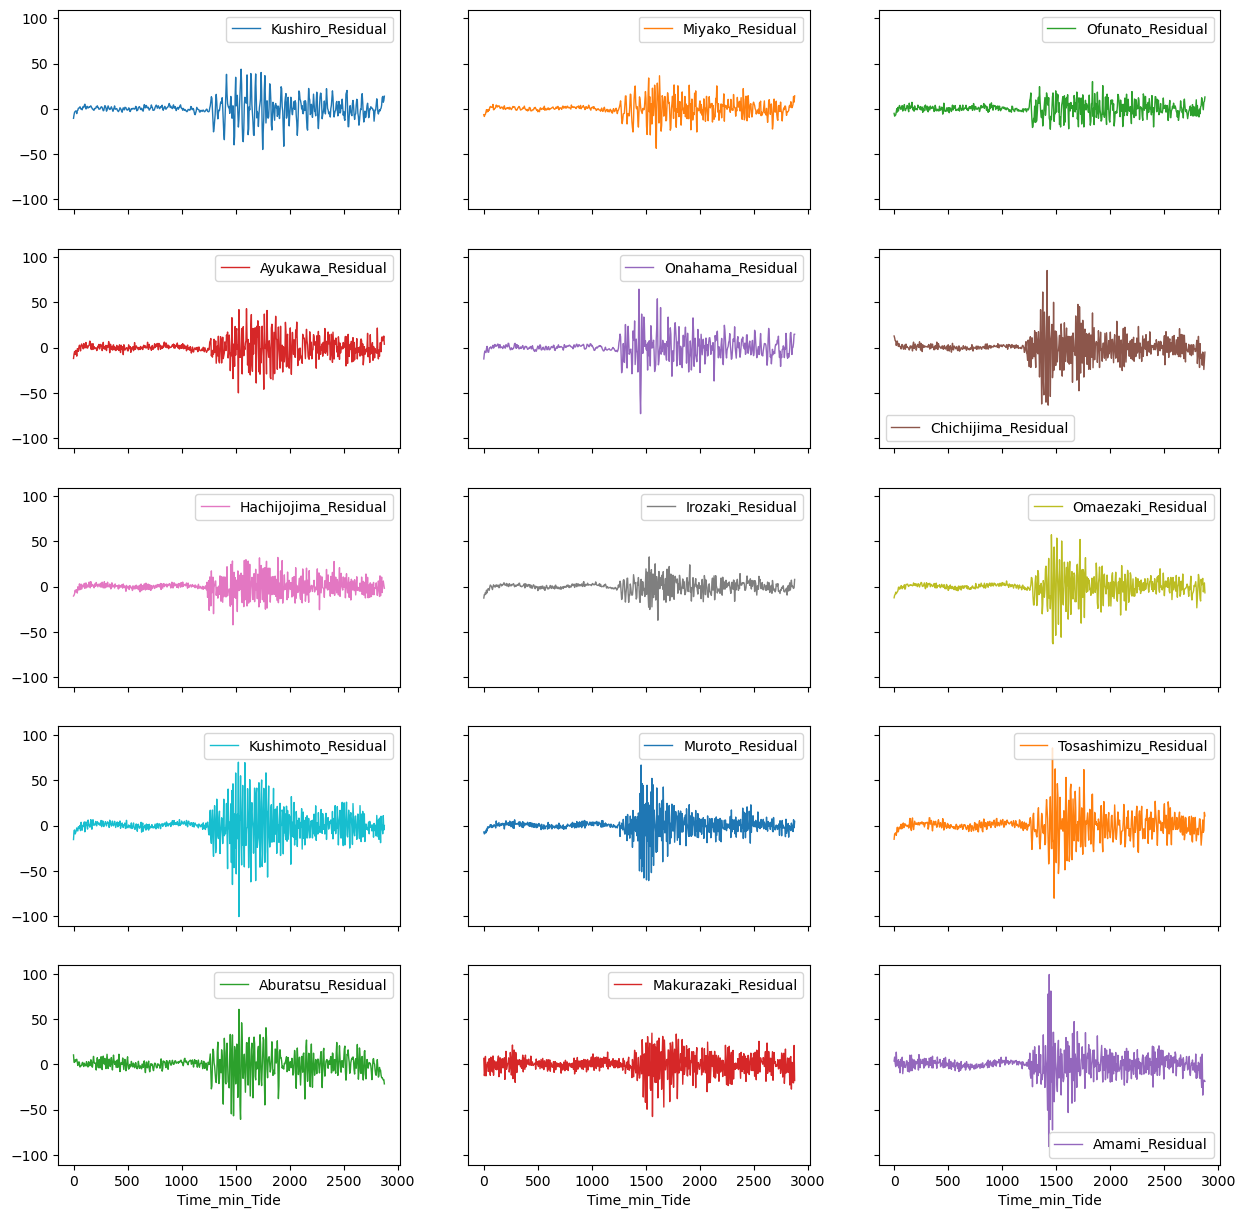

In [372]:
import matplotlib.style as mpls
mpls.use('default')

dftk.plot(subplots=True,layout=(5,3),sharex=True,sharey=True,figsize=(15,15),lw=1);


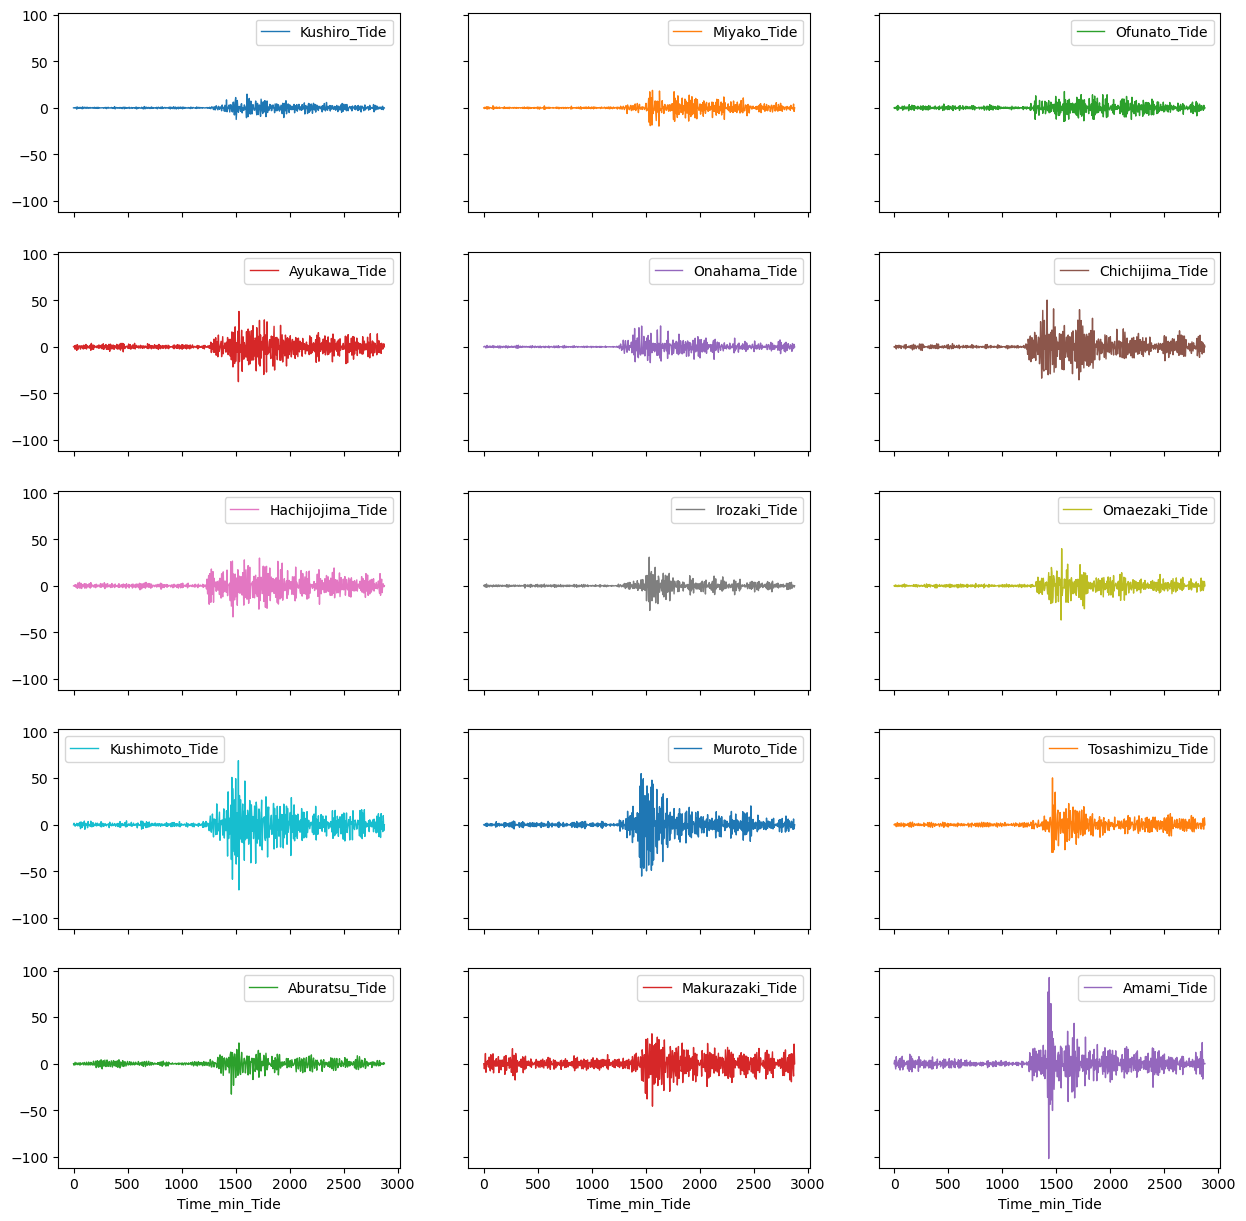

In [373]:
import matplotlib.style as mpls
mpls.use('default')

dftt.plot(subplots=True,layout=(5,3),sharex=True,sharey=True,figsize=(15,15),lw=1);


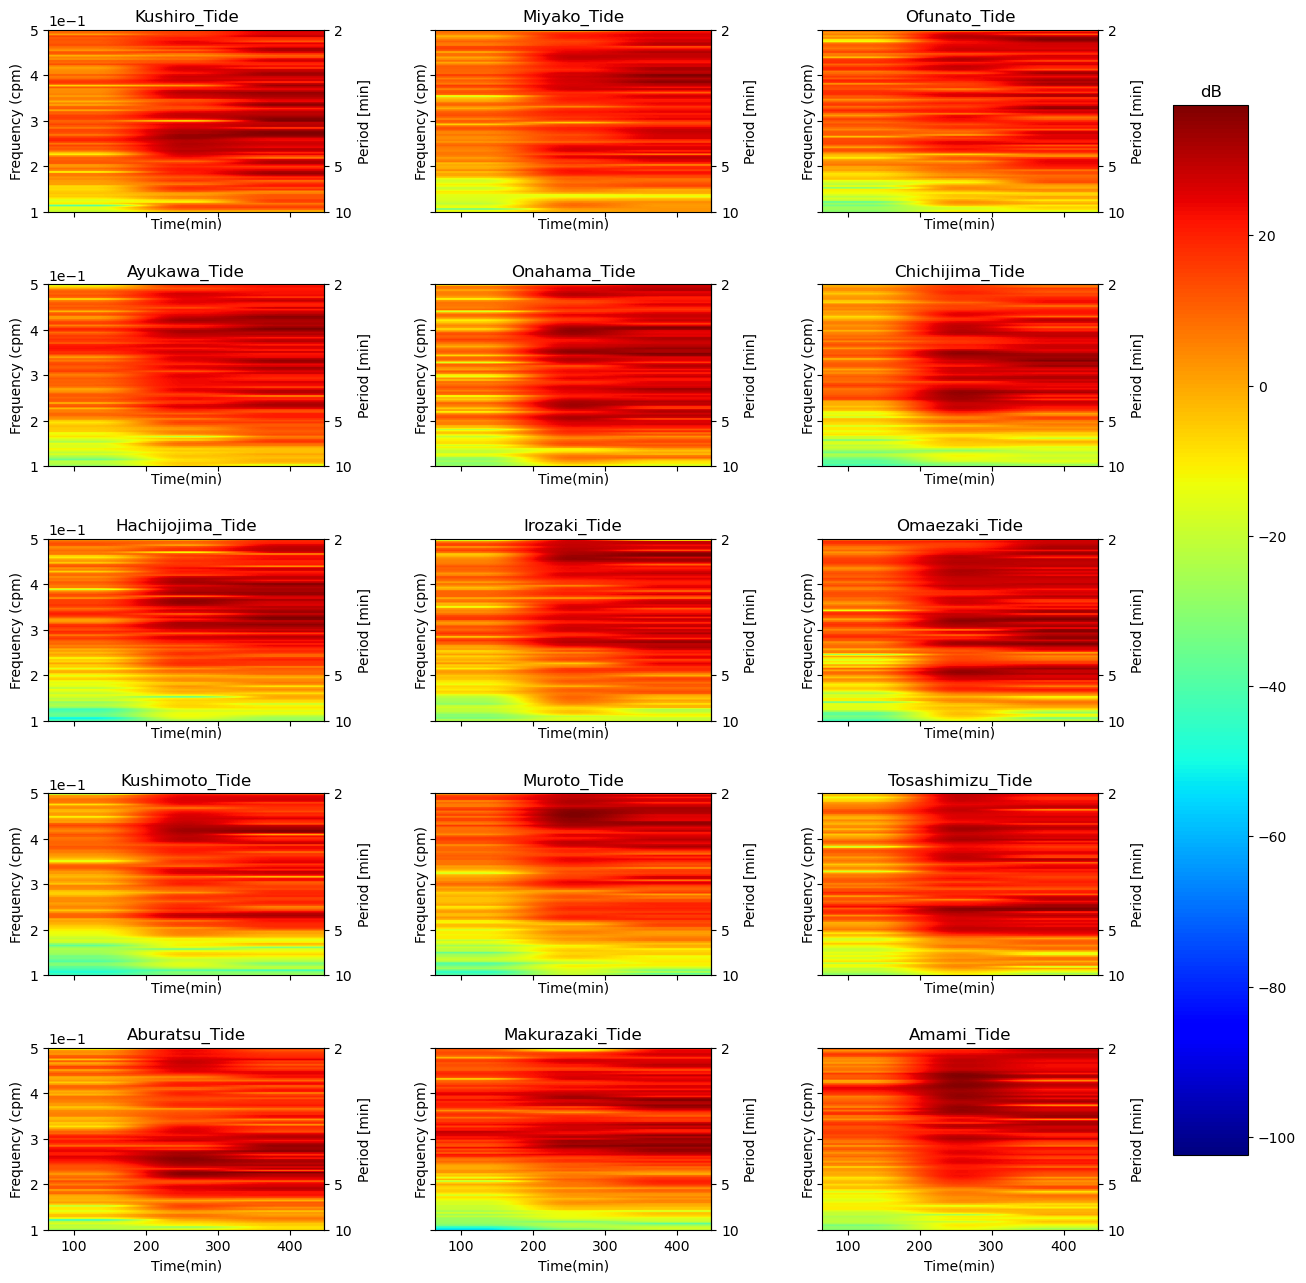

In [374]:
import numpy as np

def freq2period(x):
    # 1/x with special treatment of x == 0
    x = np.array(x).astype(float)
    near_zero = np.isclose(x, 0)
    x[near_zero] = 10e2
    x[~near_zero] = 1 / x[~near_zero]
    return x

fig,axs = plt.subplots(5,3,sharex=True,sharey=True,figsize=(15,15))
fig.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
dt = 5
for j in range(5):
    for k in range(3):
        # s,f,t,im = axs[j,k].specgram(dftt.iloc[:,3*j+k],NFFT=256,Fs=5/dt,noverlap=128,
                                    #  cmap='jet',mode='psd')#,vmin=-100, vmax=100)
        s,f,t,im = axs[j,k].specgram(dftt.iloc[:,3*j+k],Fs=5/dt,cmap='jet')
        axs[j,k].set_title(dftt.columns[3*j+k])
        axs[j,k].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
        axs[j,k].set_ylim(10e-2,5e-1)
        secax = axs[j,k].secondary_yaxis('right',functions=(freq2period,freq2period))
        secax.set_yticks([2,5,10])
        secax.set_yticklabels([2,5,10])
        secax.set_ylabel('Period [min]')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85,0.15,0.05,0.7])
fig.colorbar(im,cax=cbar_ax)
cbar_ax.set_title('dB')

for ax in axs.flat:
    ax.set(xlabel='Time(min)', ylabel='Frequency (cpm)')
    


Text(0.5, 1.0, 'dB')

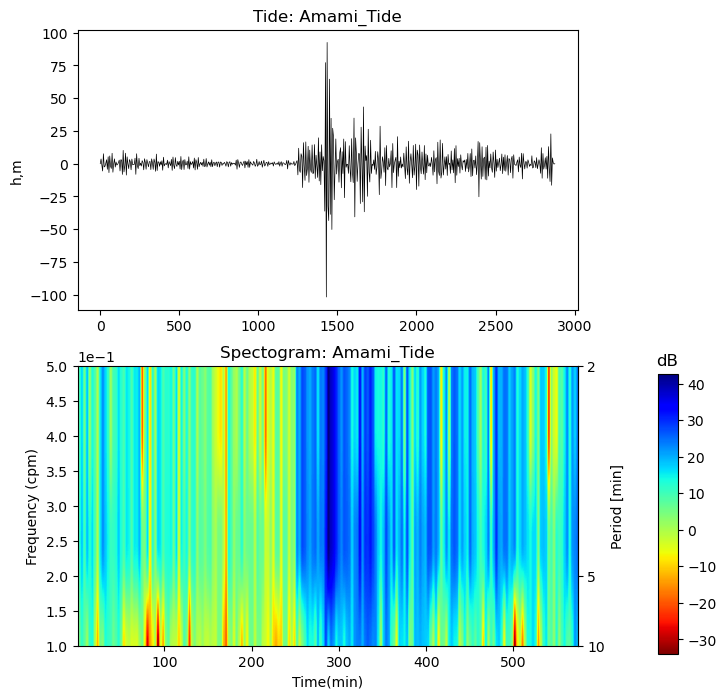

In [386]:
import numpy as np
import matplotlib.style as mpls
mpls.use('default')

def freq2period(x):
    # 1/x with special treatment of x == 0
    x = np.array(x).astype(float)
    near_zero = np.isclose(x, 0)
    x[near_zero] = 10e2
    x[~near_zero] = 1 / x[~near_zero]
    return x

col = 14
dt = 5
sign = detide_tsunami(dft.index.to_numpy(),dft.Amami_Tide.to_numpy())

fig,axs = plt.subplots(2,sharex=False,figsize=(8,8))
axs[0].plot(dft.index.to_list(),sign,c='k',lw=0.5)
axs[0].set_ylabel('h,m')
axs[0].set_title(f'Tide: {dft.columns[col]}')
s,f,t,im = axs[1].specgram(sign,NFFT=4,Fs=5/dt,noverlap=1,cmap='jet_r',mode='psd')#,vmin=0,vmax=14)
# s,f,t,im = axs[1].specgram(sign,Fs=5/dt,cmap='jet')#,vmin=0,vmax=14)
axs[1].set_title(f'Spectogram: {dft.columns[col]}')
axs[1].set_xlabel('Time(min)')
axs[1].set_ylabel('Frequency (cpm)')
axs[1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
axs[1].set_ylim(10e-2,5e-1)
secax = axs[1].secondary_yaxis('right',functions=(freq2period,freq2period))
secax.set_yticks([2,5,10])
secax.set_yticklabels([2,5,10])
secax.set_ylabel('Period [min]')
fig.subplots_adjust(right=0.75)
cbar_ax = fig.add_axes([0.85,0.1,0.025,0.35])/
fig.colorbar(im,cax=cbar_ax)
cbar_ax.set_title('dB')

# Other options

import numpy as np
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt

x = dft['p2'].to_numpy()

fig, ax = plt.subplots(2, figsize=(8, 7))
f, t, Sxx = signal.spectrogram(x, fs=10,window=('tukey',0.25),scaling='spectrum',mode='phase')
ax[0].pcolormesh(t, f, Sxx,cmap='jet_r')
ax[0].set_ylabel('Frequency [Hz]')
ax[0].set_xlabel('Time [sec]')

#### Note, if using output that is not one sided, then use the following:
f, t, Sxx = signal.spectrogram(x, fs=10, return_onesided=False)
ax[1].pcolormesh(t, fftshift(f), fftshift(Sxx, axes=0))
ax[1].set_ylabel('Frequency [Hz]')
ax[1].set_xlabel('Time [sec]')
plt.savefig("fig.png")
plt.show()

def plot_point(df,id):
    df.plot(ax=ax,x='DATE(UTC)',y='ARPRSS',label=id,cmap='jet',rot=45)
    

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for i in df.SoratenaID.unique():
    tdf = df[df.SoratenaID == i]
    plot_point(tdf,i)

import seaborn as sns

sns.set_theme(style="darkgrid")
ax = sns.pointplot(x="DATE(UTC)", y="ARPRSS", data=df, hue='ARPRSS')